In [1]:
import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [2]:
df=pd.read_csv('E:\\2\\project\\final.csv',index_col=0)

In [3]:
df.head()

,Title,Article,Category
0,Domestic equity benchmarks decline more than 1...,"The domestic equity benchmarks, in the busines...",Business
1,Gold price rise by Rs. 155 rupees at Multi Com...,Gold price today rose by 155 rupees at Multi C...,Business
2,Forex market: Domestic Unit closes at Rs. 82.0...,"In the forex market, the rupee today appreciat...",Business
3,Oil falls for a 4th session today heading for ...,"Oil fell for a fourth session today, heading f...",Business
4,US Market: Wall Street's three major stock ind...,Wall Street's three major stock indices closed...,Business


In [4]:
df.columns

Index(['Title', 'Article', 'Category'], dtype='object')

In [5]:
df.shape

(4527, 3)

In [6]:
df=df.drop_duplicates()

In [7]:
df.shape

(3405, 3)

In [8]:
df

,Title,Article,Category
0,Domestic equity benchmarks decline more than 1...,"The domestic equity benchmarks, in the busines...",Business
1,Gold price rise by Rs. 155 rupees at Multi Com...,Gold price today rose by 155 rupees at Multi C...,Business
2,Forex market: Domestic Unit closes at Rs. 82.0...,"In the forex market, the rupee today appreciat...",Business
3,Oil falls for a 4th session today heading for ...,"Oil fell for a fourth session today, heading f...",Business
4,US Market: Wall Street's three major stock ind...,Wall Street's three major stock indices closed...,Business
...,...,...,...
4501,Twitter Working On New Feature Community No...,"Earlier this month, Twitter announced that it...",Technology
4515,Philips launches new smart Wi-Fi LED downlight...,The light has been designed for home to add a ...,Technology
4516,International Women's Day 2023: Apple Watch la...,Apple is reportedly planning to bring a new he...,Technology
4517,Toll tax hike: Highway and expressway rates hi...,Tolls on India’s main highways are set to clim...,Technology


In [9]:
for i, row in df.iterrows():
    soup = BeautifulSoup(row['Title'], 'html.parser')
    if soup.find():
        df.drop(i, inplace=True)

C:\Users\NIKI\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\NIKI\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\NIKI\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\NIKI\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\NIKI\anaconda3\lib\site-packages\bs4\__init

In [10]:
df.shape

(3346, 3)

In [11]:
df['Category'].value_counts()

Business         732
Sports           732
Entertainment    693
Politics         653
Technology       535
category           1
Name: Category, dtype: int64

In [12]:
df['Title']=df['Title'].str.strip()
df['Title'] = df['Title'].str.replace('\n', '')
df['Title'] = df['Title'].apply(lambda x: re.sub(r"short by (.*)$", ' ', x))
df['Article']=df['Article'].str.strip()
df['Article'] = df['Article'].str.replace('\n', '')


In [13]:
df.shape

(3346, 3)

In [14]:
df['Article'] = df['Article'].fillna('')

df['Text']=df['Title']+" "+df['Article']
df['Text']

0       Domestic equity benchmarks decline more than 1...
1       Gold price rise by Rs. 155 rupees at Multi Com...
2       Forex market: Domestic Unit closes at Rs. 82.0...
3       Oil falls for a 4th session today heading for ...
4       US Market: Wall Street's three major stock ind...
                              ...                        
4501    Twitter Working On New Feature    Community No...
4515    Philips launches new smart Wi-Fi LED downlight...
4516    International Women's Day 2023: Apple Watch la...
4517    Toll tax hike: Highway and expressway rates hi...
4518    Haier India partnered with JioCinema as the di...
Name: Text, Length: 3346, dtype: object

In [15]:
for i in df['Text']:
    print(i)

Domestic equity benchmarks decline more than 1 per cent this week The domestic equity benchmarks, in the business week ended yesterday, declined more than one per cent.
Gold price rise by Rs. 155 rupees at Multi Commodity Exchange for April contracts Gold price today rose by 155 rupees at Multi Commodity Exchange for April contracts.
Forex market: Domestic Unit closes at Rs. 82.02 against US dollar In the forex market, the rupee today appreciated four paise against the US dollar.
Oil falls for a 4th session today heading for its biggest weekly loss in 5 weeks Oil fell for a fourth session today, heading for its biggest weekly loss in five week
US Market: Wall Street's three major stock indices close lower, with bank stocks creating biggest drag Wall Street's three major stock indices closed lower yesterday, with bank stocks creating the biggest drag.
Asian & European stocks fall after sell-off in US Bank shares Asian and European stocks fell today after sell-off in US Bank shares.
Time

In [16]:
df.to_csv('cleaned.csv')

In [17]:
target_category = df['Category'].unique()
print(target_category)

['Business' 'category' 'Entertainment' 'Politics' 'Sports' 'Technology']


In [26]:
stop_words = set(stopwords.words('english'))
new_stop_words = ["said","india"]
stop_words.update(new_stop_words)
# function to remove stopwords from a string
def remove_stopwords(text):
    filtered_words = [word for word in text.split() if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# apply the function to the 'text' column of the dataframe
#df['text'] = df['text'].apply(remove_stopwords)

In [27]:
special_chars_pattern = r'[^a-zA-Z0-9\s]'
def remove_special_chars(text):
    return re.sub(special_chars_pattern, '', text)

In [28]:
def convert_lower(text):
    return text.lower()

In [29]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

In [30]:

def wordcloud_draw(dataset):

    wordcloud = WordCloud(stopwords = stop_words,background_color = 'white',width = 2500, height = 2500).generate(' '.join(dataset))
    plt.figure(1, figsize = (10,7))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [31]:
df['Text'] = df['Text'].apply(remove_stopwords)
df['Text'] = df['Text'].apply(remove_special_chars)
df['Text'] = df['Text'].apply(convert_lower)
df['Text'] = df['Text'].apply(lemmatize_words)


business related words:


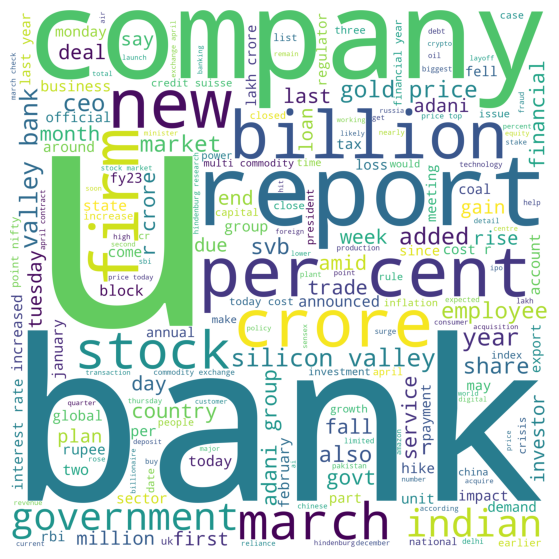

In [32]:
business = df[df['Category'] == 'Business']
business = business['Text']
print("business related words:")

wordcloud_draw(business)

Technology related words:


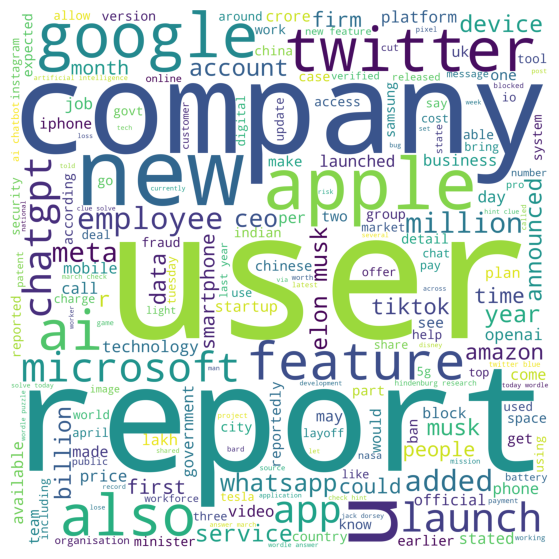

In [33]:
tech = df[df['Category'] == 'Technology']
tech = tech['Text']

print("Technology related words:")

wordcloud_draw(tech)

Sports related words:


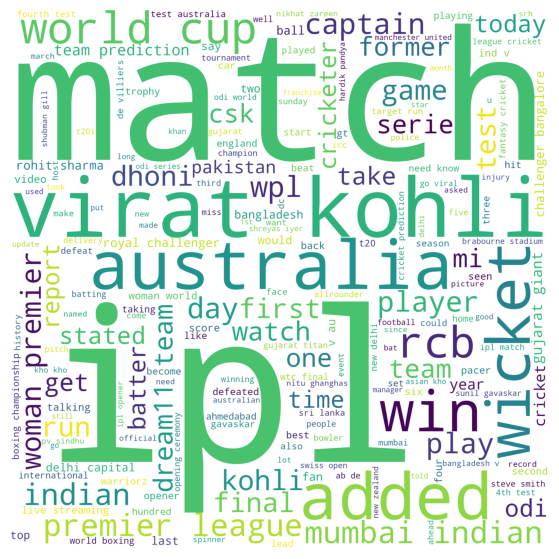

In [34]:
sports = df[df['Category'] == 'Sports']
sports = sports['Text']

print("Sports related words:")

wordcloud_draw(sports)

Entertainment related words:


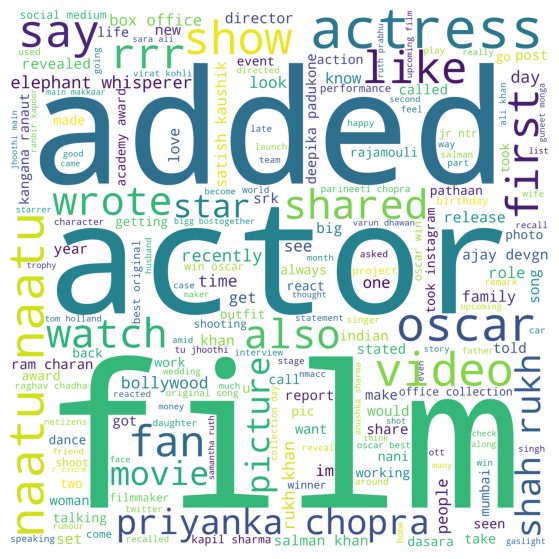

In [35]:
entertainment = df[df['Category'] == 'Entertainment']
entertainment = entertainment['Text']

print("Entertainment related words:")

wordcloud_draw(entertainment)

In [36]:
#declare dependent and independent value

x = df['Text']
y = df['Category']

In [37]:
#Create and Fit Bag of Words Model
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(df.Text.values)
y = np.array(df.Category.values)
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(df.Text).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (3346, 5000)
y.shape =  (3346,)


In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

2342
1004


In [39]:
#create list of model and accuracy dicts
perform_list = [ ]
def run_model(model_name, est_c, est_pnlty):
    mdl=''

    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()

    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)

    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB(alpha=1.0,fit_prior=True)

    elif model_name == 'Support Vector Classifer':
        mdl = SVC()

    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()

    elif model_name == 'K Nearest Neighbour':
        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)

    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()

    oneVsRest = OneVsRestClassifier(mdl)

    oneVsRest.fit(x_train, y_train)

    y_pred = oneVsRest.predict(x_test)

    # Performance metrics

    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

    # Get precision, recall, f1 scores

    precision, recall, f1score, support = score(y_test, y_pred, average='micro')

    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')

    print(f'Precision : {precision}')

    print(f'Recall : {recall}')

    print(f'F1-score : {f1score}')

    # Add performance parameters to list

    perform_list.append(dict([('Model', model_name),('Test Accuracy', round(accuracy, 2)),('Precision', round(precision, 2)),('Recall', round(recall, 2)),('F1', round(f1score, 2))]))



In [40]:
run_model('Logistic Regression', est_c=None, est_pnlty=None)


Test Accuracy Score of Basic Logistic Regression: % 78.39
Precision : 0.7838645418326693
Recall : 0.7838645418326693
F1-score : 0.7838645418326694


In [41]:
run_model('Random Forest', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Random Forest: % 79.68
Precision : 0.796812749003984
Recall : 0.796812749003984
F1-score : 0.7968127490039841


In [42]:
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Multinomial Naive Bayes: % 81.57
Precision : 0.8157370517928287
Recall : 0.8157370517928287
F1-score : 0.8157370517928287


In [43]:
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Support Vector Classifer: % 80.68
Precision : 0.8067729083665338
Recall : 0.8067729083665338
F1-score : 0.8067729083665338


In [44]:
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Decision Tree Classifier: % 64.84
Precision : 0.648406374501992
Recall : 0.648406374501992
F1-score : 0.648406374501992


In [45]:
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic K Nearest Neighbour: % 54.98
Precision : 0.549800796812749
Recall : 0.549800796812749
F1-score : 0.549800796812749


In [46]:
run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Gaussian Naive Bayes: % 64.14
Precision : 0.6414342629482072
Recall : 0.6414342629482072
F1-score : 0.6414342629482072


In [47]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Test Accuracy,Precision,Recall,F1
0,Logistic Regression,78.39,0.78,0.78,0.78
1,Random Forest,79.68,0.80,0.80,0.80
2,Multinomial Naive Bayes,81.57,0.82,0.82,0.82
3,Support Vector Classifer,80.68,0.81,0.81,0.81
4,Decision Tree Classifier,64.84,0.65,0.65,0.65
5,K Nearest Neighbour,54.98,0.55,0.55,0.55
6,Gaussian Naive Bayes,64.14,0.64,0.64,0.64


In [68]:
classifier = GaussianNB();
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [70]:
y_pred1 = cv.transform(['Captains pose with IPL 2023 trophy at Narendra Modi Stadium, Rohit Sharma missing']).toarray()
yy = classifier.predict(y_pred1)
print(yy)

['Entertainment']


In [71]:
y_pred1 = cv.transform(['Which players have been ruled out of IPL 2023 that will begin tomorrow?']).toarray()
yy = classifier.predict(y_pred1)
print(yy)

['Sports']


In [72]:
y_pred1 = cv.transform(['Bard not trained using ChatGPT: Google on claims it copied OpenAI']).toarray()
yy = classifier.predict(y_pred1)
print(yy)

['Technology']


In [74]:
y_pred1 = cv.transform(['Makers of Prabhas Adipurush unveil new poster on Ram Navami']).toarray()
yy = classifier.predict(y_pred1)
print(yy)

['Entertainment']
